# 1. Loading the dataset

In [39]:


# There are many to load the dataset in system 

# 1. Load from a URL
# url = "https://example.com/data.csv"
# df = pd.read_csv(url)

# 2. Load from SQL / Database
# import sqlite3
# Connect to SQLite database
# conn = sqlite3.connect("my_database.db")
# Load table into pandas
# df = pd.read_sql_query("SELECT * FROM table_name", conn)
# conn.close()

# 3. Load from a (Local device)
# import pandas as pd
# CSV file in the same folder as your script/notebook
# df = pd.read_csv("data.csv")
# CSV file in a different folder
# df = pd.read_csv(r"C:\Users\YourName\Documents\data.csv")
# Similarly we can do it for excel, json etc

# 4. Load from google drive
# from google.colab import drive
# drive.mount('/content/drive')
# import pandas as pd
# Example: CSV file in My Drive
# df = pd.read_csv('/content/drive/MyDrive/folder_name/data.csv')

# 5. Interactive File Upload
# from google.colab import files
# import pandas as pd
# uploaded = files.upload()  # Opens a file picker
# Convert uploaded file to DataFrame
# for file_name in uploaded.keys():
#     df = pd.read_csv(file_name)  
#     print(df.head())



In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Toyota.csv')


# 2. Understand the dataset

In [41]:
print(df.shape)
print(df.info())
print(df.head())
print(df.tail())
print(df.describe())

(1436, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 123.5+ KB
None
   Unnamed: 0  Price   Age     KM FuelType  HP  MetColor  Automatic    CC  \
0           0  13500  23.0  46986   Diesel  90       1.0          0  2000   
1           1  13750  23.0  72937   Diesel  90       1.0          0  2000   
2           2  13950  24.0  41711   Diesel  90   

# 3. Remove Unnecessary Columns

Drop irrelevant or auto-generated columns (e.g., Unnamed: 0, IDs, duplicates).

In [42]:
df = df.drop(columns=['Unnamed: 0'])
print(df)

      Price   Age     KM FuelType   HP  MetColor  Automatic    CC  Doors  \
0     13500  23.0  46986   Diesel   90       1.0          0  2000  three   
1     13750  23.0  72937   Diesel   90       1.0          0  2000      3   
2     13950  24.0  41711   Diesel   90       NaN          0  2000      3   
3     14950  26.0  48000   Diesel   90       0.0          0  2000      3   
4     13750  30.0  38500   Diesel   90       0.0          0  2000      3   
...     ...   ...    ...      ...  ...       ...        ...   ...    ...   
1431   7500   NaN  20544   Petrol   86       1.0          0  1300      3   
1432  10845  72.0     ??   Petrol   86       0.0          0  1300      3   
1433   8500   NaN  17016   Petrol   86       0.0          0  1300      3   
1434   7250  70.0     ??      NaN   86       1.0          0  1300      3   
1435   6950  76.0      1   Petrol  110       0.0          0  1600      5   

      Weight  
0       1165  
1       1165  
2       1165  
3       1165  
4       1170

# 4. Handle Special Characters / Dirty Data

In [43]:
# Checking Weather the special character exists in the dataset
# Checking whether special characters exist in the dataset
for col in df.select_dtypes(include=['object']).columns:
    # na=False ensures NaN values are treated as False
    rows = df[df[col].str.contains(r'[^a-zA-Z0-9 ]', na=False)]
    if not rows.empty:
        print(f"Special characters found in column '{col}':")
        print(rows)


# Replace invalid placeholders with NaN
df['KM'] = df['KM'].replace('??', np.nan)
df['HP'] = df['HP'].replace('????', np.nan)

print(df.tail())
 


Special characters found in column 'KM':
      Price   Age  KM FuelType    HP  MetColor  Automatic    CC Doors  Weight
6     16900  27.0  ??   Diesel  ????       NaN          0  2000     3    1245
64    17950  27.0  ??   Petrol    97       1.0          0  1400     5    1110
91    22250  20.0  ??   Diesel    90       1.0          0  2000     3    1260
112   24950   8.0  ??   Diesel   116       1.0          0  2000     5    1320
125   21750  16.0  ??   Petrol   110       1.0          0  1600     5    1130
131   15950  20.0  ??   Petrol    97       1.0          0  1400     5    1110
398   10500  55.0  ??   Petrol   110       1.0          0  1600     4    1035
491   10750  54.0  ??   Petrol   110       1.0          0  1600     5    1075
1049   6750  77.0  ??   Diesel    72       1.0          0  2000     4    1100
1120   7350  72.0  ??   Petrol    86       1.0          0  1300     3    1015
1421   8500  78.0  ??   Petrol    86       0.0          1  1300     3    1045
1425   7950  80.0  ??  

# 5. Handle Missing Values

In [44]:
# 1. Handling the missing values
#  checking if there is any misssing values in the dataset
print(df.isnull().sum())
# Removing the missing values
# a. Directly remove the tuple of the missing data
# print(df.dropna(inplace=True)) - not recommended 
# b. Replace the int and float by mean or median and object by mode
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['MetColor'].fillna(df['MetColor'].median(), inplace=True)
df['FuelType'].fillna(df['FuelType'].mode()[0], inplace=True)
df['KM'].fillna(df['KM'].mode()[0], inplace=True)
df['HP'].fillna(df['HP'].mode()[0], inplace=True)
#  checking if there is any misssing values in the dataset
print(df.isnull().sum())

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64
Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64


# 6. Remove Duplicates

Avoid double-counting:

In [45]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(1436, 10)
(1436, 10)


# 7. Handling the outliers

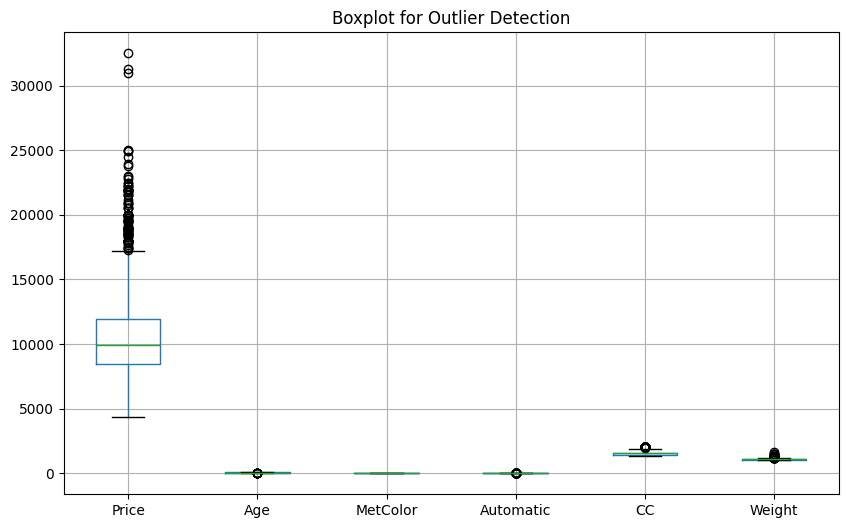

(1436, 10)
Index(['Price', 'Age', 'MetColor', 'Automatic', 'CC', 'Weight'], dtype='object')
(1129, 10)


In [46]:
# 2. Removing the outliers
plt.figure(figsize=(10,6))
df.select_dtypes(include=['int64','float64']).boxplot()
plt.title("Boxplot for Outlier Detection")
plt.show()

print(df.shape)

num_col = df.select_dtypes(include=['int64', 'float64']).columns
print(num_col)

def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    high = q3 + 1.5 * iqr
    low = q1 - 1.5 * iqr
    df_cleaned = df[(df[col] >= low) & (df[col] <= high)]
    return df_cleaned

for col in num_col:
    df = remove_outliers(df, col)

print(df.shape)

# 8. Final Check

Make sure all issues are resolved:

In [49]:
df.info()
df.isnull().sum()
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 1129 entries, 9 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1129 non-null   int64  
 1   Age        1129 non-null   float64
 2   KM         1129 non-null   object 
 3   FuelType   1129 non-null   object 
 4   HP         1129 non-null   object 
 5   MetColor   1129 non-null   float64
 6   Automatic  1129 non-null   int64  
 7   CC         1129 non-null   int64  
 8   Doors      1129 non-null   object 
 9   Weight     1129 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 97.0+ KB
    Price   Age     KM FuelType   HP  MetColor  Automatic    CC Doors  Weight
9   12950  23.0  71138   Diesel  110       1.0          0  1900     3    1105
18  16750  24.0  25563   Petrol  110       0.0          0  1600     3    1065
19  16950  30.0  64359   Petrol  110       1.0          0  1600     3    1105
20  15950  30.0  67660   Petrol  110       

# 9. Saving the Cleaned dataset

In [48]:
# Save cleaned DataFrame to CSV
df.to_csv("Toyota_cleaned_data.csv", index=False)
